При наличии второй производной можно справиться за меньшее число итераций

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fder2(x):
    return -np.cos(x)

In [3]:
def fder(x):
    return -np.sin(x)

In [4]:
def f(x):
    return np.cos(x)+1

In [5]:
def newton_iteration_convergence(f, fder, x0, eps=1e-5, maxiter=1000): 
    """Newton's root finding method for f(x)=0
    Parameters
    ----------
    f : callable Function f.
    fder : callable Derivative of f.
    x0 : float
    Initial point for iterations.
    eps : float
    Requested accuracy.
    maxiter : int
    Maximal number of iterations.
    Returns -------
    x : float
    Approximate root.
    niter : int
    Number of iterations. """
    z = []
    z.append(x0)
    z.append(z[0] - f(z[0]) / fder(z[0]))
    i = 2
    while i < maxiter and np.abs(z[i - 1] - z[i - 2]) > eps:
        z.append(z[i - 1] - f(z[i - 1]) / fder(z[i - 1]))
        i += 1
    return z

In [6]:
def newton_iteration_a_bit_better(f, fder, fder2, x0, eps=1e-5, maxiter=1000): 
    z = []
    z.append(x0)
    z.append(z[0] - 2 * f(z[0]) * fder(z[0]) / (2 * (fder(z[0]))**2 - f(z[0]) * fder2(z[0])))
    i = 2
    while i < maxiter and np.abs(z[i - 1] - z[i - 2]) > eps:
        z.append(z[i - 1] - 2 * f(z[i - 1]) * fder(z[i - 1]) / (2 * (fder(z[i - 1]))**2 - f(z[i - 1]) * fder2(z[i - 1])))
        i += 1
    return z

Iterations: 13


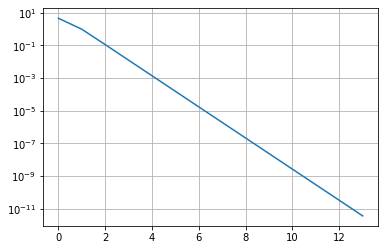

Iterations: 16


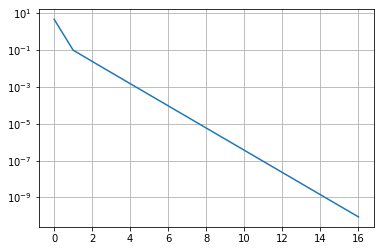

In [7]:
x = newton_iteration_a_bit_better(f, fder, fder2, 1)
erf = [(x[i]-np.pi)**2 for i in range(len(x))]
print("Iterations:", len(x) - 1)
plt.yscale('log')
plt.plot(erf) 
plt.grid() 
plt.show()

x = newton_iteration_convergence(f, fder, 1)
erf = [(x[i]-np.pi)**2 for i in range(len(x))]
print("Iterations:", len(x) - 1)
plt.yscale('log')
plt.plot(erf) 
plt.grid() 
plt.show()